In [ ]:
!pip install d2l==0.17.2

# 1. Libraries and Hyper-parameters


In [1]:
import torch
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l

batch_size, num_steps = 32, 35
train_iter, vocab = d2l.load_data_time_machine(batch_size, num_steps)

In [2]:
num_hiddens = 256
num_epochs, lr = 500, 1
device = d2l.try_gpu()

# 2. GRU

perplexity 1.0, 122689.3 tokens/sec on cuda:0
time travelleryou can show black is white by argument said filby
travelleryou can show black is white by argument said filby


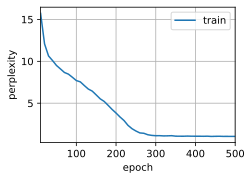

In [3]:
num_inputs = len(vocab)
gru_layer = nn.GRU(num_inputs, num_hiddens)
model = d2l.RNNModel(gru_layer, len(vocab))
model = model.to(device)
d2l.train_ch8(model, train_iter, vocab, lr, num_epochs, device)

# 3. LSTM

perplexity 1.1, 101313.1 tokens/sec on cuda:0
time travelleryou can show black is white by argument said filby
traveller a thanded and this iout aflisceos ho mo expssided


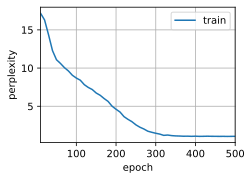

In [4]:
num_inputs = len(vocab)
lstm_layer = nn.LSTM(num_inputs, num_hiddens)
model = d2l.RNNModel(lstm_layer, len(vocab))
model = model.to(device)
d2l.train_ch8(model, train_iter, vocab, lr, num_epochs, device)

# 4. Multi-layers


perplexity 1.1, 79073.7 tokens/sec on cuda:0
time traveller for so it will be convenient to speak of himwas e
travelleryou can show black is white by argument said filby


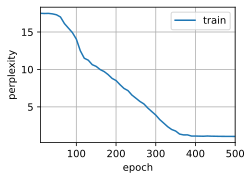

In [5]:
num_inputs, num_hiddens, num_layers = len(vocab), 256, 2
lstm_layer = nn.LSTM(num_inputs, num_hiddens, num_layers)
model = d2l.RNNModel(lstm_layer, len(vocab))
model = model.to(device)
d2l.train_ch8(model, train_iter, vocab, lr, num_epochs, device)

# 5. Bidirectional RNN
Noted that bidirectional layers are used very sparingly and only for a narrow set of applications, such as filling in missing words, annotating tokens, 

and encoding sequences wholesale as a step in a sequence processing pipeline (e.g., for machine translation)

It's not appropriate for this task.

perplexity 1.1, 29407.7 tokens/sec on cuda:0
time travellerererererererererererererererererererererererererer
travellerererererererererererererererererererererererererer


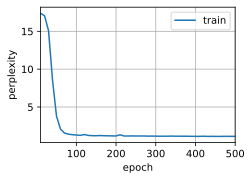

In [6]:
num_inputs, num_hiddens, num_layers = len(vocab), 256, 2
lstm_layer = nn.LSTM(num_inputs, num_hiddens, num_layers, bidirectional=True)
model = d2l.RNNModel(lstm_layer, len(vocab))
model = model.to(device)
d2l.train_ch8(model, train_iter, vocab, lr, num_epochs, device)

Bidirectional RNNs use past and future data, so the ability of the model to predict future tokens is severely compromised. 

Despite we got reasonable perplexity, the model only generates gibberish even after many iterations.